# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [ ]:

import pandas as pd


data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)


df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


<ipython-input-11-7d141c975721>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-11-7d141c975721>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:

data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)


df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


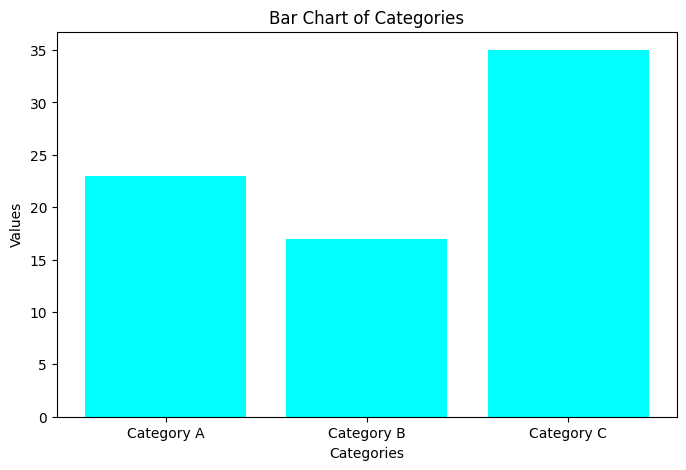

In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


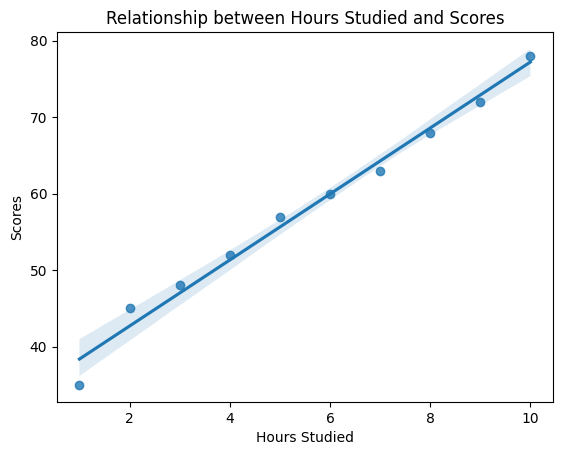

In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('train.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)


imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


df.dropna(subset=['Survived'], inplace=True)


df.drop(columns=['Cabin'], inplace=True)


df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Age'] >= lower_bound['Age']) & (df['Age'] <= upper_bound['Age'])]
df = df[(df['Fare'] >= lower_bound['Fare']) & (df['Fare'] <= upper_bound['Fare'])]


scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())
print(df.dtypes)

df.to_csv('cleaned_titanic.csv', index=False)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

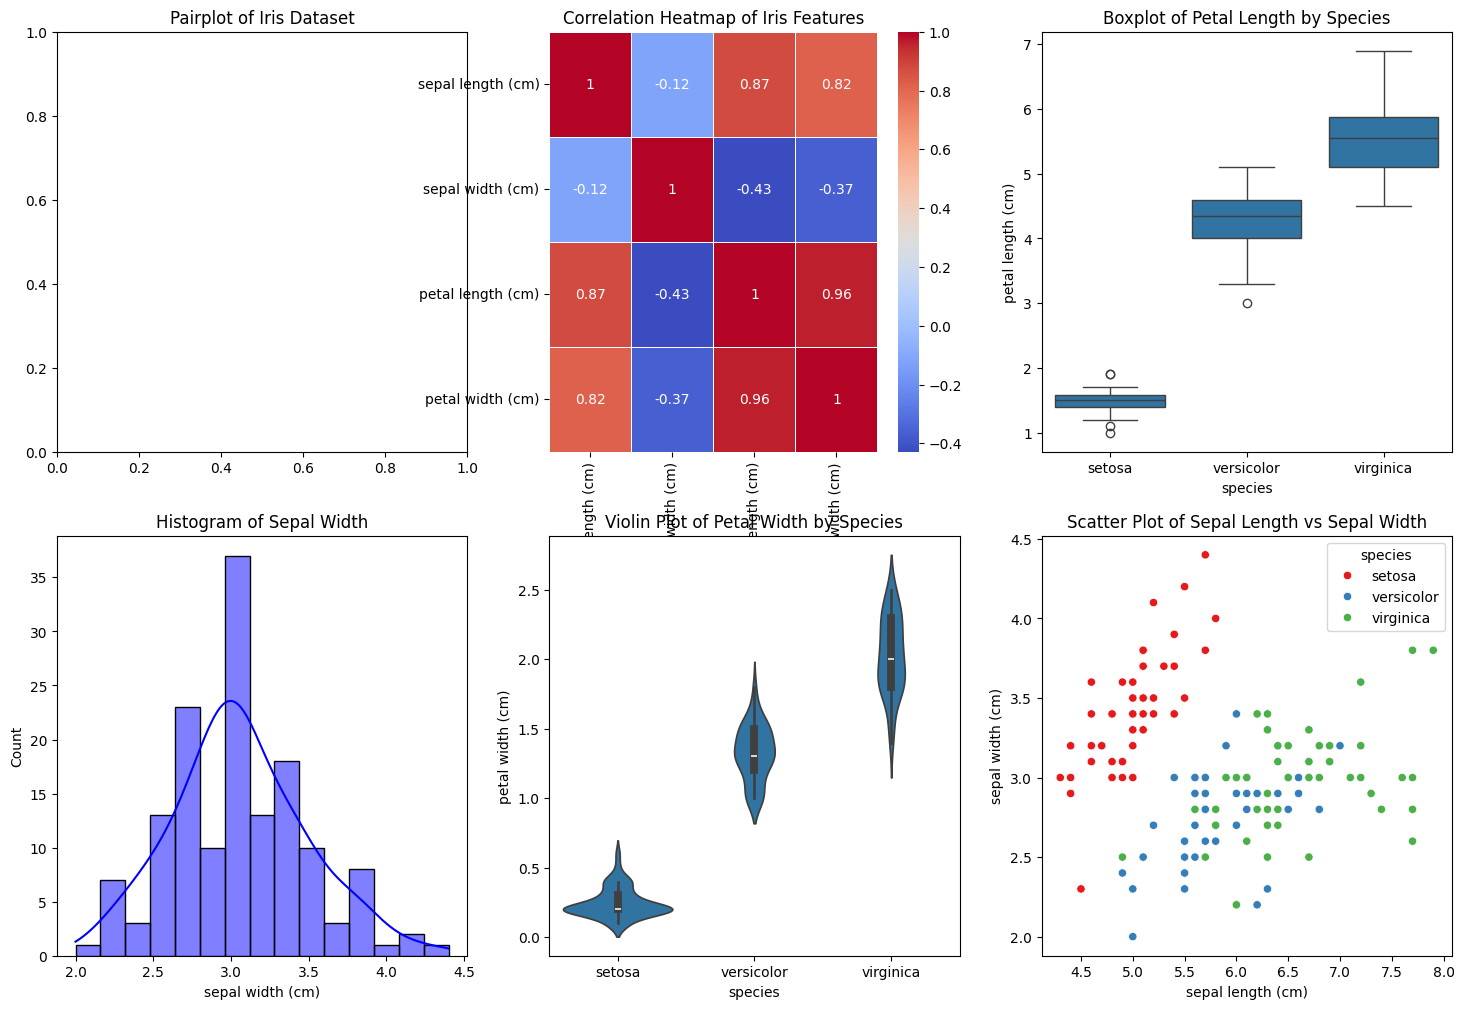

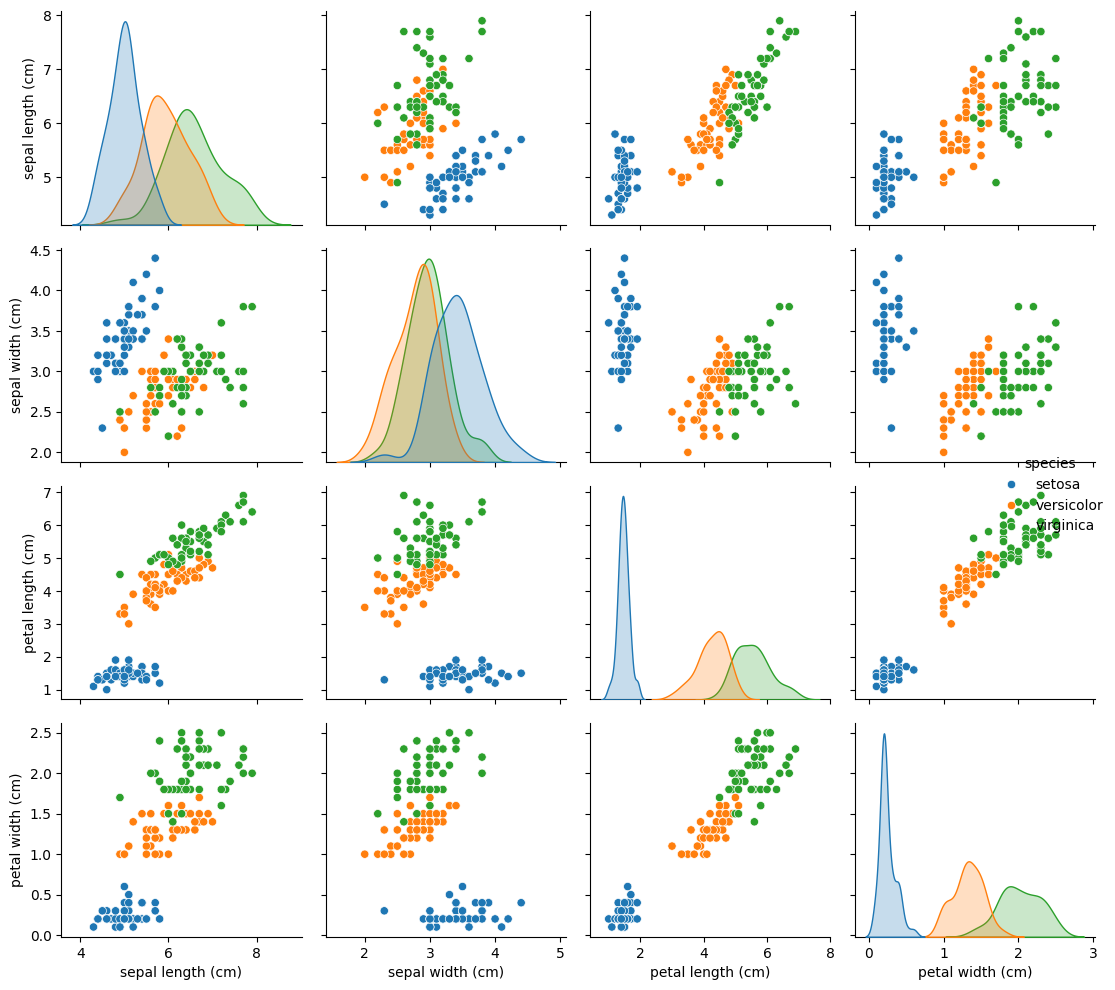

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)


df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.pairplot(df, hue='species')
axes[0, 0].set_title('Pairplot of Iris Dataset')

correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap of Iris Features')


sns.boxplot(x='species', y='petal length (cm)', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Petal Length by Species')


sns.histplot(df['sepal width (cm)'], kde=True, bins=15, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Sepal Width')


sns.violinplot(x='species', y='petal width (cm)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot of Petal Width by Species')


sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='Set1', ax=axes[1, 2])
axes[1, 2].set_title('Scatter Plot of Sepal Length vs Sepal Width')


plt.tight_layout()
plt.show()
